## Hyperparameter Optimization For Xgboost using RandomizedSearchCV
#### Implement K Fold Cross Validation and Stratified K Fold Cross Validation

Problem statement is basically information from bank here we need to predict whether the customer is going to leave bank in future or not

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.shape

(10000, 14)

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


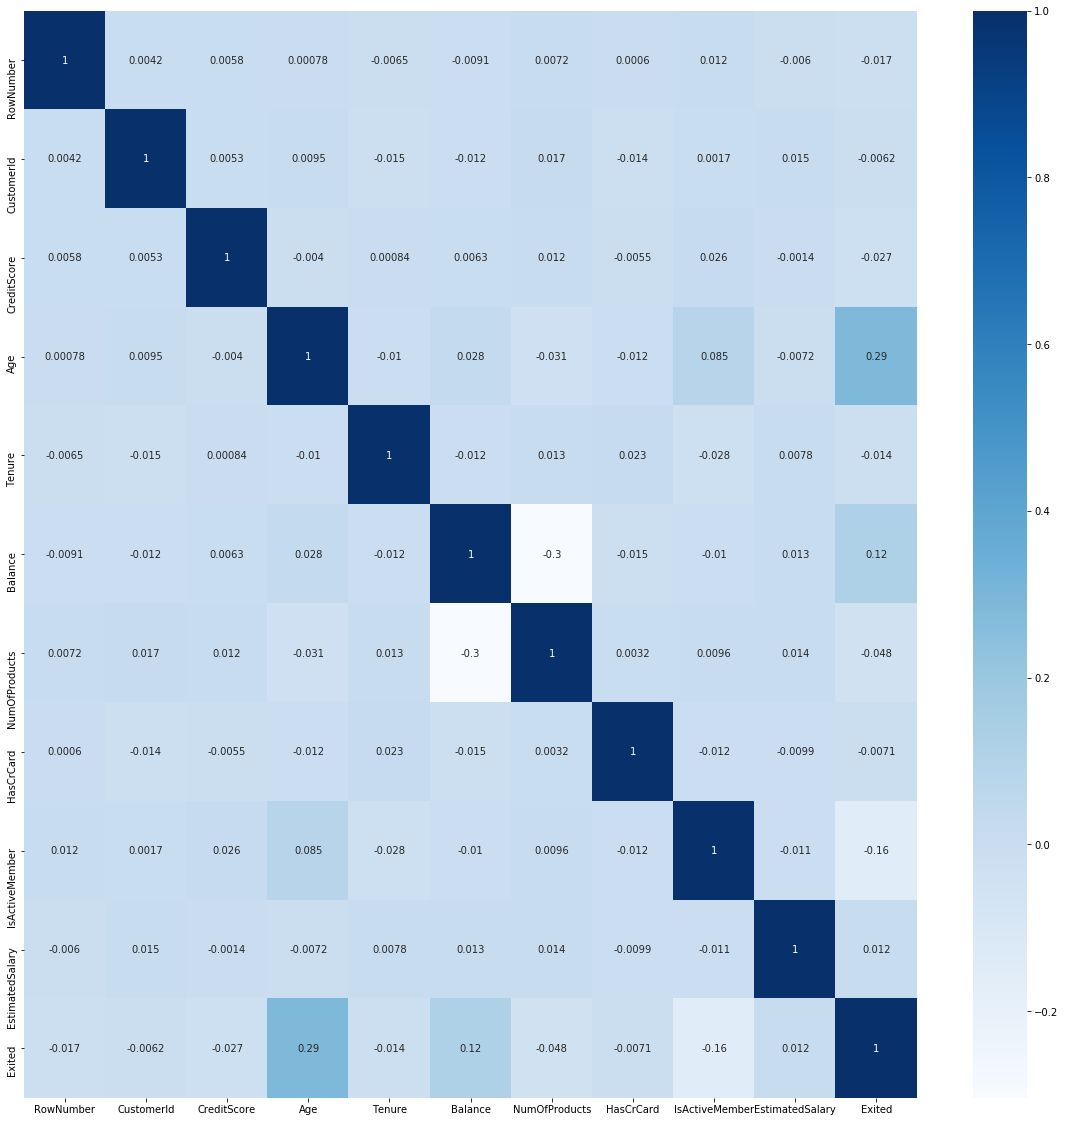

In [8]:
#get correlations of each features in dataset
corr_mat=df.corr()
plt.figure(figsize=(20,20))
#plot heatmap
sns.heatmap(df[corr_mat.index].corr(),annot=True,cmap="Blues")

In [9]:
#Get the Independent and Dependent Features
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [10]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
geography=pd.get_dummies(X["Geography"],prefix="Geography",prefix_sep='_',drop_first=True)

In [12]:
geography

,Geography_Germany,Geography_Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
X["Gender"]=X["Gender"].map({"Male":1,"Female":0})
#gender=pd.get_dummies(df["Gender"],drop_first=True)

In [15]:
X=pd.concat([X,geography],axis=1)

In [16]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,1


In [17]:
X=X.drop(["Geography"],axis=1)

## Hyper Parameter Optimization

In [18]:
params={
    "learning_rate":[0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ], 
    "max_depth":[ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight":[ 1, 3, 5, 7 ],
    "gamma":[ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree":[ 0.3, 0.4, 0.5 , 0.7 ]
}

In [19]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
import xgboost

In [20]:
classifier=xgboost.XGBClassifier()

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=80)

In [22]:
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
print("confusion_matrix:\n", confusion_matrix(y_pred,y_test))
print("accuracy_score:",accuracy_score(y_pred,y_test))
print("classification_report:\n",classification_report(y_pred,y_test))

confusion_matrix:
 [[2259  298]
 [ 136  307]]
accuracy_score: 0.8553333333333333
classification_report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91      2557
           1       0.51      0.69      0.59       443

    accuracy                           0.86      3000
   macro avg       0.73      0.79      0.75      3000
weighted avg       0.88      0.86      0.86      3000



In [24]:
random_search=RandomizedSearchCV(estimator=classifier,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3,scoring="roc_auc",)

In [25]:
from datetime import datetime
# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
#timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:    7.0s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    7.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100...
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [26]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [28]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=200)

In [30]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
y_pred=classifier.predict(X_test)

In [32]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
print(cm)
acc_score=accuracy_score(y_pred,y_test)
acc_score

[[2293  355]
 [  77  275]]


0.856

## Cross Validation

#### K Fold CV

In [34]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)
score

array([0.866, 0.858, 0.874, 0.866, 0.866, 0.848, 0.862, 0.878, 0.853,
       0.85 ])

In [35]:
score.mean()

0.8620999999999999

## Stratified K fold Cross Validation

It is basically used for imbalance dataset, the split of dataset is happened in such a way that atleast you will be having some good proportion of values of imbalance dataset available whenever we are doing this train test split

In [36]:
X.shape,y.shape

((10000, 11), (10000,))

In [37]:
from sklearn.model_selection import StratifiedKFold

In [38]:
skf=StratifiedKFold(n_splits=10)

In [39]:
skf.get_n_splits(X,y)

10

In [40]:
X.iloc[1965]

CreditScore             612.0
Gender                    0.0
Age                      33.0
Tenure                    9.0
Balance                   0.0
NumOfProducts             1.0
HasCrCard                 0.0
IsActiveMember            0.0
EstimatedSalary      142797.5
Geography_Germany         0.0
Geography_Spain           0.0
Name: 1965, dtype: float64

In [41]:
from sklearn.model_selection import StratifiedKFold
accuracy=[]

skf = StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X, y)
# X is the feature set and y is the target
for train_index,test_index in skf.split(X,y):
    print("Train:\n",train_index,"\n Validation:\n", test_index)
    X1_train,X1_test=X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
    
    classifier.fit(X1_train,y1_train)
    y_predt=classifier.predict(X1_test)
    score=accuracy_score(y_predt,y1_test)
    accuracy.append(score)
print(accuracy)

Train:
 [1000 1001 1002 ... 9997 9998 9999] 
 Validation:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 

Train:
 [   0    1    2 ... 9997 9998 9999] 
 Validation:
 [1965 1977 1985 1987 1988 1993 1994 1996 2005 2007 2009 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027
 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041
 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055
 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069
 2070 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 2083
 2084 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2097
 2098 2099 2100 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111
 2112 2113 2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125
 2126 2127 2128 2129 2130 2131 2132 2133 2134 2135 2136 2137 2138 2139
 2140 2141 2142 2143 2144 2145 2146 2147 2148 2149 2150 2151 2152 2153
 2154 2155 2156 2157 2158 2159 2160 2161 2162 2163 2164 2165 2166 2167
 2168 2169 2170 2171 2172 2173 2174 2175 2176 2177 2178 2179 2180 2181
 2182 2183 2184 21

Train:
 [   0    1    2 ... 9997 9998 9999] 
 Validation:
 [3840 3841 3843 3861 3877 3879 3885 3898 3902 3910 3913 3917 3921 3930
 3935 3938 3940 3941 3951 3957 3959 3964 3969 3975 3979 3982 3983 3988
 3991 3998 4001 4005 4013 4014 4017 4021 4026 4033 4036 4037 4038 4041
 4042 4043 4044 4045 4046 4047 4048 4049 4050 4051 4052 4053 4054 4055
 4056 4057 4058 4059 4060 4061 4062 4063 4064 4065 4066 4067 4068 4069
 4070 4071 4072 4073 4074 4075 4076 4077 4078 4079 4080 4081 4082 4083
 4084 4085 4086 4087 4088 4089 4090 4091 4092 4093 4094 4095 4096 4097
 4098 4099 4100 4101 4102 4103 4104 4105 4106 4107 4108 4109 4110 4111
 4112 4113 4114 4115 4116 4117 4118 4119 4120 4121 4122 4123 4124 4125
 4126 4127 4128 4129 4130 4131 4132 4133 4134 4135 4136 4137 4138 4139
 4140 4141 4142 4143 4144 4145 4146 4147 4148 4149 4150 4151 4152 4153
 4154 4155 4156 4157 4158 4159 4160 4161 4162 4163 4164 4165 4166 4167
 4168 4169 4170 4171 4172 4173 4174 4175 4176 4177 4178 4179 4180 4181
 4182 4183 4184 41

Train:
 [   0    1    2 ... 9997 9998 9999] 
 Validation:
 [5887 5888 5903 5904 5908 5915 5922 5923 5926 5927 5931 5933 5936 5940
 5942 5949 5950 5952 5955 5960 5962 5972 5976 5986 5989 6000 6001 6011
 6014 6022 6023 6028 6029 6033 6034 6035 6036 6037 6038 6039 6040 6041
 6042 6043 6044 6045 6046 6047 6048 6049 6050 6051 6052 6053 6054 6055
 6056 6057 6058 6059 6060 6061 6062 6063 6064 6065 6066 6067 6068 6069
 6070 6071 6072 6073 6074 6075 6076 6077 6078 6079 6080 6081 6082 6083
 6084 6085 6086 6087 6088 6089 6090 6091 6092 6093 6094 6095 6096 6097
 6098 6099 6100 6101 6102 6103 6104 6105 6106 6107 6108 6109 6110 6111
 6112 6113 6114 6115 6116 6117 6118 6119 6120 6121 6122 6123 6124 6125
 6126 6127 6128 6129 6130 6131 6132 6133 6134 6135 6136 6137 6138 6139
 6140 6141 6142 6143 6144 6145 6146 6147 6148 6149 6150 6151 6152 6153
 6154 6155 6156 6157 6158 6159 6160 6161 6162 6163 6164 6165 6166 6167
 6168 6169 6170 6171 6172 6173 6174 6175 6176 6177 6178 6179 6180 6181
 6182 6183 6184 61

Train:
 [   0    1    2 ... 9997 9998 9999] 
 Validation:
 [7900 7909 7915 7926 7927 7937 7942 7943 7944 7949 7962 7965 7969 7974
 7994 7998 8003 8007 8010 8018 8020 8021 8022 8023 8024 8025 8026 8027
 8028 8029 8030 8031 8032 8033 8034 8035 8036 8037 8038 8039 8040 8041
 8042 8043 8044 8045 8046 8047 8048 8049 8050 8051 8052 8053 8054 8055
 8056 8057 8058 8059 8060 8061 8062 8063 8064 8065 8066 8067 8068 8069
 8070 8071 8072 8073 8074 8075 8076 8077 8078 8079 8080 8081 8082 8083
 8084 8085 8086 8087 8088 8089 8090 8091 8092 8093 8094 8095 8096 8097
 8098 8099 8100 8101 8102 8103 8104 8105 8106 8107 8108 8109 8110 8111
 8112 8113 8114 8115 8116 8117 8118 8119 8120 8121 8122 8123 8124 8125
 8126 8127 8128 8129 8130 8131 8132 8133 8134 8135 8136 8137 8138 8139
 8140 8141 8142 8143 8144 8145 8146 8147 8148 8149 8150 8151 8152 8153
 8154 8155 8156 8157 8158 8159 8160 8161 8162 8163 8164 8165 8166 8167
 8168 8169 8170 8171 8172 8173 8174 8175 8176 8177 8178 8179 8180 8181
 8182 8183 8184 81

[0.866, 0.858, 0.874, 0.866, 0.866, 0.848, 0.862, 0.878, 0.853, 0.85]


In [42]:
np.array(accuracy).mean()

0.8620999999999999

### Repeated K_fold Cross_Validation
Repeats K-Fold n times with different randomization in each repetition.                
For imbalance dataset you should not use this

In [43]:
from sklearn.model_selection import RepeatedKFold
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=10)

In [44]:
cv

RepeatedKFold(n_repeats=3, n_splits=10, random_state=10)

In [46]:
score=cross_val_score(classifier,X,y,cv=cv)
score

array([0.844, 0.868, 0.858, 0.858, 0.873, 0.867, 0.866, 0.856, 0.861,
       0.868, 0.841, 0.858, 0.873, 0.858, 0.867, 0.87 , 0.856, 0.861,
       0.87 , 0.869, 0.86 , 0.864, 0.867, 0.888, 0.866, 0.842, 0.858,
       0.873, 0.863, 0.848])

In [47]:
score.mean()

0.8623666666666666

## Leave one Out Cross Validation (LOOCV)

In [49]:
from sklearn.model_selection import LeaveOneOut
lv=LeaveOneOut()
score=cross_val_score(classifier,X,y,cv=cv)
score

array([0.844, 0.868, 0.858, 0.858, 0.873, 0.867, 0.866, 0.856, 0.861,
       0.868, 0.841, 0.858, 0.873, 0.858, 0.867, 0.87 , 0.856, 0.861,
       0.87 , 0.869, 0.86 , 0.864, 0.867, 0.888, 0.866, 0.842, 0.858,
       0.873, 0.863, 0.848])

In [50]:
score.mean()

0.8623666666666666